# Pymaceuticals Findings

* Treatment with Capomulin was associated with the least tumor growth and metastatic spread, and highest survival rates of the four drugs isolated here.
* The difference between Capomulin and the other drugs was smallest in the measure of metastatic spread. While Capomulin led to significantly less metastatic spread than placebo, it only showed slightly more improvement than Infubinol and Ketapril, as shown by the overlap of the error bars. This suggests that metastatic spread may be a marker that is less receptive to drug treatment than tumor growth or survival rates.
* Tumor growth occurred very linearly, while mouse survival decreased in a much less regular fashion. This suggests that there may be other factors besides tumor growth affecting the rate of survival of the mice.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
drug_data = pd.merge(mouse_drug_data, clinical_trial_data, how="outer", on="Mouse ID")

# Display the data table for preview
drug_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_subset = drug_data[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Calculate the means of the tumor volumes
mean_tumor_volume = tumor_subset.groupby(["Drug", "Timepoint"]).mean()

# Preview DataFrame
mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
mean_tumor_volume = mean_tumor_volume.reset_index()

mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_tumor_volume = tumor_subset.groupby(["Drug", "Timepoint"]).sem()
stderr_tumor_volume = stderr_tumor_volume.reset_index()

# Preview DataFrame
stderr_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_clean = pd.pivot_table(mean_tumor_volume, values="Tumor Volume (mm3)", 
                                      index=["Timepoint"], columns=["Drug"])

stderr_tumor_volume_clean = pd.pivot_table(stderr_tumor_volume, values="Tumor Volume (mm3)", 
                                      index=["Timepoint"], columns=["Drug"])

# Preview that Reformatting worked
mean_tumor_volume_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


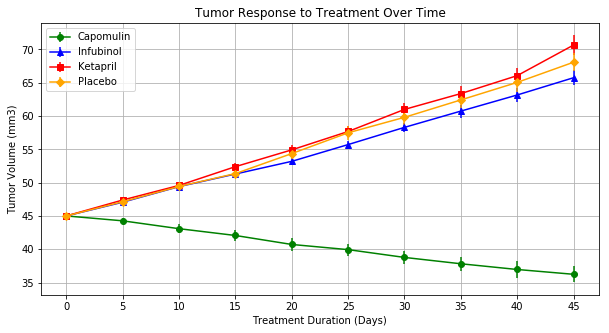

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.errorbar(mean_tumor_volume_clean.index, mean_tumor_volume_clean["Capomulin"],
           stderr_tumor_volume_clean["Capomulin"], label="Capomulin", color="green", marker='o')
ax.errorbar(mean_tumor_volume_clean.index, mean_tumor_volume_clean["Infubinol"],
           stderr_tumor_volume_clean["Infubinol"], label="Infubinol", color="blue", marker='^')
ax.errorbar(mean_tumor_volume_clean.index, mean_tumor_volume_clean["Ketapril"],
           stderr_tumor_volume_clean["Ketapril"], label="Ketapril", color="red", marker='s')
ax.errorbar(mean_tumor_volume_clean.index, mean_tumor_volume_clean["Placebo"],
           stderr_tumor_volume_clean["Placebo"], label="Placebo", color="orange", marker='D')

plt.title("Tumor Response to Treatment Over Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.xticks(list(mean_tumor_volume_clean.index))


# Save the Figure
plt.legend(loc="best")
plt.grid()
plt.savefig("Graphs/TumorResponseOverTime.png")

plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_subset = drug_data[["Drug", "Timepoint", "Metastatic Sites"]]

# Convert to DataFrame
mean_metastatic = metastatic_subset.groupby(["Drug", "Timepoint"]).mean()
mean_metastatic = mean_metastatic.reset_index()

# Preview DataFrame
mean_metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_metastatic = metastatic_subset.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
stderr_metastatic = stderr_metastatic.reset_index()

# Preview DataFrame
stderr_metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_clean = pd.pivot_table(mean_metastatic, values="Metastatic Sites",
                                      index=["Timepoint"], columns=["Drug"])
stderr_metastatic_clean = pd.pivot_table(stderr_metastatic, values="Metastatic Sites",
                                      index=["Timepoint"], columns=["Drug"])

# Preview that Reformatting worked
mean_metastatic_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


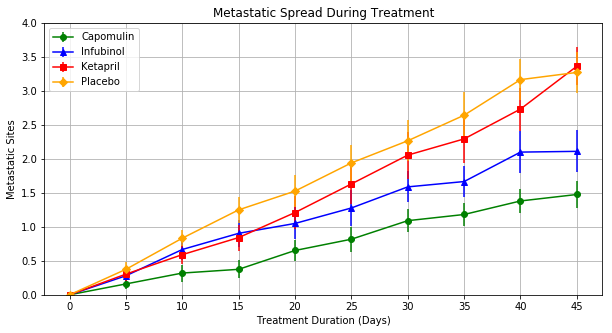

In [10]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.errorbar(mean_metastatic_clean.index, mean_metastatic_clean["Capomulin"],
           stderr_metastatic_clean["Capomulin"], label="Capomulin", color="green", marker='o')
ax.errorbar(mean_metastatic_clean.index, mean_metastatic_clean["Infubinol"],
           stderr_metastatic_clean["Infubinol"], label="Infubinol", color="blue", marker='^')
ax.errorbar(mean_metastatic_clean.index, mean_metastatic_clean["Ketapril"],
           stderr_metastatic_clean["Ketapril"], label="Ketapril", color="red", marker='s')
ax.errorbar(mean_metastatic_clean.index, mean_metastatic_clean["Placebo"],
           stderr_metastatic_clean["Placebo"], label="Placebo", color="orange", marker='D')

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.xticks(list(mean_metastatic_clean.index))
plt.ylim(0, 4)


# Save the Figure
plt.legend(loc="best")
plt.grid()
plt.savefig("Graphs/MetastaticSpreadOverTime.png")

# Show the figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_subset = drug_data[["Mouse ID", "Drug", "Timepoint"]]

mice_count = mice_subset.groupby(["Drug", "Timepoint"]).count()

# Convert to DataFrame
mice_count = mice_count.reset_index()

# Preview DataFrame
mice_count.head()

# No standard error needed here, because we're simply counting the number of mice

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frame
mice_count_clean = pd.pivot_table(mice_count, values="Mouse ID",
                           index=["Timepoint"], columns=["Drug"])

# Preview the Data Frame
mice_count_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


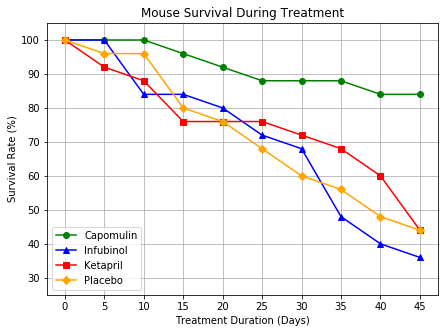

In [13]:
# Generate the Plot (Accounting for percentages)
starter_count = mice_count_clean.loc[0]

plt.figure(figsize=(7, 5))

plt.plot(mice_count_clean.index, mice_count_clean["Capomulin"] / starter_count["Capomulin"] * 100,
        label="Capomulin", color="green", marker='o')
plt.plot(mice_count_clean.index, mice_count_clean["Infubinol"] / starter_count["Infubinol"] * 100,
        label="Infubinol", color="blue", marker='^')
plt.plot(mice_count_clean.index, mice_count_clean["Ketapril"] / starter_count["Ketapril"] * 100,
        label="Ketapril", color="red", marker='s')
plt.plot(mice_count_clean.index, mice_count_clean["Placebo"] / starter_count["Placebo"] * 100,
        label="Placebo", color="orange", marker='D')

plt.title("Mouse Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Treatment Duration (Days)")
plt.xticks(list(mice_count_clean.index))
plt.ylim(25, 105)


# Save the Figure
plt.legend(loc="best")
plt.grid()
plt.savefig("Graphs/MouseSurvival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_changes = ((mean_tumor_volume_clean.loc[45] - mean_tumor_volume_clean.loc[0]) /
                 mean_tumor_volume_clean.loc[0]) * 100

# Display the data to confirm
tumor_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

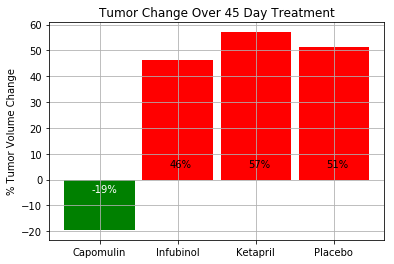

In [15]:
# Store all Relevant Percent Changes into a Tuple
tumor_changes_subset = tumor_changes[["Capomulin","Infubinol", "Ketapril", "Placebo"]]
colors = ["green", "red", "red", "red"]

# Make the barplot
fig, ax = plt.subplots(1, 1)

# Orient widths. Add labels, tick marks, etc. 
ax.bar(tumor_changes_subset.index, tumor_changes_subset, color=colors, width=.9, align="center")

for i in range(len(tumor_changes_subset)):
    if i == 0:
        ax.text(i - .1, -5, f'{int(tumor_changes_subset.iloc[i])}%', color="white")
    else:
        ax.text(i - .1, 5, f'{int(tumor_changes_subset.iloc[i])}%')

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")

# Save the Figure
plt.grid()
plt.savefig("Graphs/SummaryTumorChange.png")

# Show the Figure
plt.show()